In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('C:\\Users\\imzam\\Documents\\Jupyter\\Data\\Loan Status Prediction\\train.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


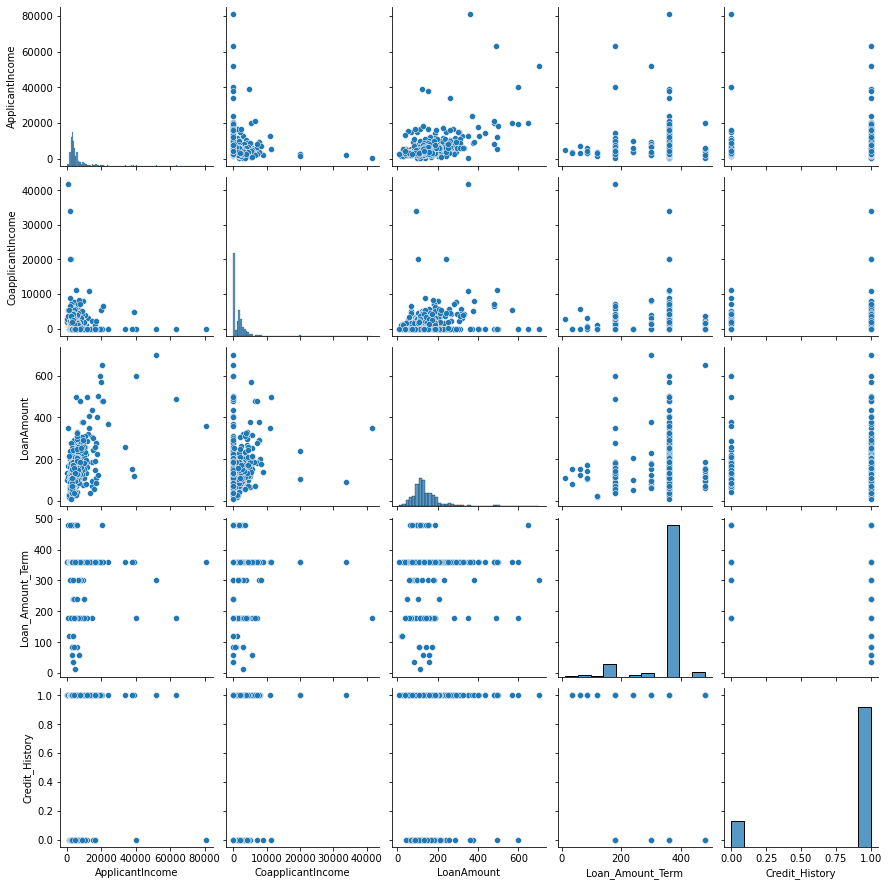

In [10]:
sns.pairplot(df)

In [12]:
categorical_features = df.select_dtypes('object').columns.to_list()
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:>

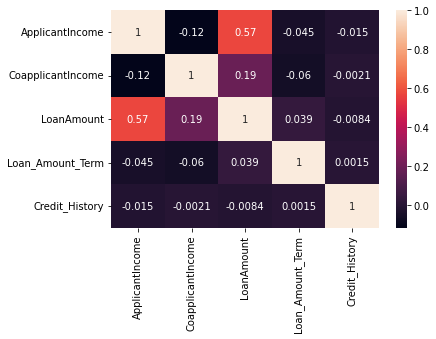

In [14]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [18]:
df["Gender"]=df["Gender"].fillna("Male")

In [19]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:

print(df["Dependents"].value_counts())
df["Married"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64

In [21]:
df["Married"].mode()

0    Yes
Name: Married, dtype: object

In [22]:
df["Married"]=df["Married"].fillna("Yes")

In [23]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [24]:
df["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [25]:
df["Dependents"]=df["Dependents"].fillna("0")

In [26]:
df[df["Dependents"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [27]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
df["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [29]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [30]:
df["LoanAmount"].describe(),df["LoanAmount"].median()

(count    592.000000
 mean     146.412162
 std       85.587325
 min        9.000000
 25%      100.000000
 50%      128.000000
 75%      168.000000
 max      700.000000
 Name: LoanAmount, dtype: float64,
 128.0)

In [31]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop(columns=["Loan_ID","Loan_Status"],axis=1)
y=df["Loan_Status"]

In [35]:
X["Dependents"]=X["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})

In [42]:
df_dummy=pd.get_dummies(X,columns=["Gender","Married","Education","Self_Employed","Property_Area"])

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 52.9+ KB


In [45]:
X["Dependents"].unique()

array([0, 1, 2, 3], dtype=int64)

In [46]:
df_dummy.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1


In [47]:
X_new=df_dummy
y=y.map({"Y":1,"N":0})

In [48]:
sum(y)/len(y)

0.6872964169381107

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 5)

In [65]:
sum(y_train)/len(y_train) , sum(y_test)/len(y_test)

(0.6713286713286714, 0.7243243243243244)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [66]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        51
           1       0.83      0.94      0.88       134

    accuracy                           0.82       185
   macro avg       0.80      0.73      0.75       185
weighted avg       0.82      0.82      0.81       185

accuracy is 0.8216216216216217


C:\Users\imzam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\imzam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


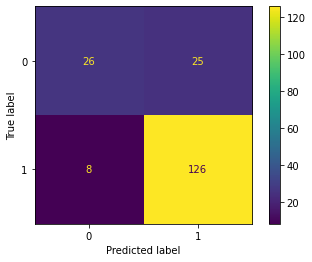

In [67]:
plot_confusion_matrix(LR,X_test,y_test)

In [68]:
LR.score(X_test,y_test)

0.8216216216216217

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
D_model=DecisionTreeClassifier()
D_model.fit(X_train,y_train)
D_model.predict(X_test)
y_dtpredict=D_model.predict(X_test)
D_model.score(X_test,y_test)

0.7189189189189189

C:\Users\imzam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


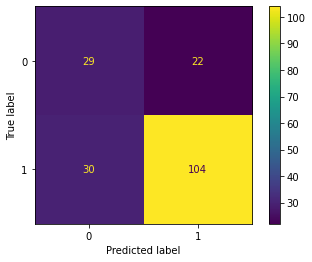

In [72]:
plot_confusion_matrix(D_model,X_test,y_test)

In [73]:
#  prediction Summary by species
print(classification_report(y_test, y_dtpredict))

# Accuracy score
DT_SC = accuracy_score(y_dtpredict,y_test)
print('accuracy is',accuracy_score(y_dtpredict,y_test))

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        51
           1       0.83      0.78      0.80       134

    accuracy                           0.72       185
   macro avg       0.66      0.67      0.66       185
weighted avg       0.73      0.72      0.72       185

accuracy is 0.7189189189189189
